<a href="https://colab.research.google.com/github/sgr1118/GD-NLP-Theory/blob/main/GD2_vocab(220922).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 들어가며

![](https://bejewled-roll-712.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F9226a9f1-b8c5-457d-a9e8-eb76ebae8e17%2FUntitled.png?table=block&id=374fd116-59df-489a-98ea-ea375079486f&spaceId=cf00f34b-d12b-4ca3-8c0d-8b0c76e26aeb&width=1490&userId=&cache=v2)

퍼즐 맞추는 것을 즐기시나요? 머리가 복잡해 어딘가에 몰두하고 싶거나, 작은 성취가 고플 땐 퍼즐이 아주 좋답니다. 난이도 별로, 그림 별로 정말 많은 퍼즐이 있고 심지어는 아예 그림이 없는 퍼즐도 있다고 해요 (백야 퍼즐이라고 불린답니다). 필자는 너무 조각 수가 많지 않고, 예쁜 명화를 채워 넣는 퍼즐을 간간이 즐깁니다!

문득 생각하길, 문장을 만드는 것이 마치 퍼즐 맞추기 같더군요. 조각들이 제각기 다른 모양을 가지고 있고, 맞는 위치에 있더라도 그림이 다를 수 있죠. 모양과 그림이 모두 맞아야 비로소 작품이 완성되는 것, 마치 문맥과 문법을 고려하는 것과 꼭 닮았습니다! 대신 우리의 문장 퍼즐은 단 하나의 작품을 목표로 하지 않죠. 올바르게 맞춰진 퍼즐, 그 위의 그림이 어울린다면 그 자체로 작품입니다!

이번 코스에서 우리가 배울 것이 바로 문장을 조각내는 방법입니다. 어떤 문장을 일정한 기준을 갖는 단어로 쪼개는 것, 그것은 곧 퍼즐 조각을 나누는 것과 같죠! 지나치게 잘게 쪼개면 넓은 그림을 담을 수 없어 다시 맞추기 어려울 것이고, 너무 크게 쪼갰다간 퍼즐이 너무 쉬워지고 말 겁니다.

이번 코스에선 문장 데이터를 직접 토큰화하며 어떤 방법이 가장 적합한 단어 조각을 만들어 내는지 실습해보도록 하겠습니다.

### 준비물

---

이번 코스에서는 *KoNLPy,* 그중에서도 가장 성능이 준수한 MeCab클래스를 활용해 실습하도록 하겠습니다!

클라우드 환경에는 이미 설치되어 있습니다. 아래 링크에서 확인만 해보세요.

- [설치하기 - KoNLPy 0.5.2 documentation](http://konlpy.org/ko/latest/install/)

설치가 완료된 후엔 아주 간편하게 import 하여 형태소 분석기를 사용하실 수 있습니다.

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [ ]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


# 2. 데이터 다운로드 및 분석

In [ ]:
# 라이브러리 불러오기

import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [ ]:
!wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
# !mkdir -p ~/aiffel/sp_tokenizer/data
# !mv korean-english-park.train.tar.gz ~/aiffel/sp_tokenizer/data
# !cd ~/aiffel/sp_tokenizer/data
!tar -xzvf korean-english-park.train.tar.gz


In [ ]:
# 파일 불러오기
path_to_file = '/content/korean-english-park.train.ko'

with open(path_to_file, 'r') as f:
  raw = f.read().splitlines()

print('Data size:', len(raw))

print('Example:')
for sen in raw[0:100][::20]: print('>>', sen)

Data size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


내려받은 데이터는 **한국어의 형태소 분석과 품사 태깅, 기계 번역 연구**를 위해 공개된 데이터입니다. 이번에 사용할 데이터는 한국어-영어 병렬을 이루는 말뭉치 중 한국어 부분으로, 전체 병렬 말뭉치는 후에 번역기를 만들며 사용할 예정입니다!

혹시 다른 종류의 데이터가 궁금하시다면 아래 Github를 방문해보세요!

[jungyeul/korean-parallel-corpora](https://github.com/jungyeul/korean-parallel-corpora)

자, 데이터가 우리 손으로 들어왔으니 씹고 뜯고 맛볼 차례입니다! 멋진 시각화를 동반한 통계적 분석...까지는 하지 않고요. 최소한의 분석으로 데이터가 얼마나 있고, 어떻게 생겼는지 정도를 직접 확인해 봅시다.

문장은 위에서 확인한 것처럼 `94123`개가 포함되어 있습니다. 우리는 각 문장이 어느 정도의 길이를 가지는지 확인해보겠습니다! 이 과정을 거치면 지나치게 긴 데이터를 삭제하거나 (*연산량을 감소시켜 학습 속도가 빨라집니다!*) 지나치게 짧은 데이터를 검증 (*무조건 필요가 없지는 않습니다, `단어 ↔ 단어` 라면 번역을 학습할 수 있겠죠!*) 할 수 있습니다. 즉, 데이터를 얼마나 사용할지 타협점을 정의할 수 있습니다.

아래 소스는 문장의 **최단 길이, 최장 길이, 평균 길이**를 구한 후 **문장 길이 분포를 막대그래프로 표현**해 주는 소스입니다. `raw` 변수는 앞서 다운로드받은 데이터가 담긴 변수입니다!

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


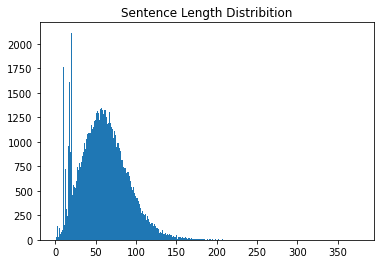

In [ ]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print('문장의 최단 길이:', min_len)
print('문장의 최장 길이:', max_len)
print('문장의 평균 길이:', sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width = 1.0)
plt.title('Sentence Length Distribition')
plt.show()

3가지 의문 해결하기

1) 길이 1 짜리 문장은 도대체 어떻게 생겨먹었지?

2) 앞에 치솟는 임의의 구간은 뭐지? 유의미한 데이터가 담겨있는 부분인가?

3) 어디서부터 어디까지 잘라서 쓰지

In [ ]:
# 길이 1짜리 문장은 무엇인가?

def check_sentence_with_length(raw, length):
  count = 0

  for sen in raw:
    if len(sen) == length:
      print(sen)
      count += 1
      if count > 100: return

check_sentence_with_length(raw, 1)

’


In [ ]:
for idx, _sum in enumerate(sentence_length):
  # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
  if _sum > 1500:
    print('Outlier Index:', idx+1)

In [ ]:
check_sentence_with_length(raw, 11)

중복 처리가 되어있지않아있다. 중복 제거가 필요하다. 중복 제거는 python의 기본 자료형 set 활용

set은 집합을 정의하는 자료형인데, 중복을 허용하지 얺어 변환 관정에서 자동으로 중복된 요쇼를 제거해준다.

대신 list의 순서가 섞일수도있으니 만약 번역 데이터처럼 쌍을 이뤄야 하는 경우라면 주의해서 사용해야한다.

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


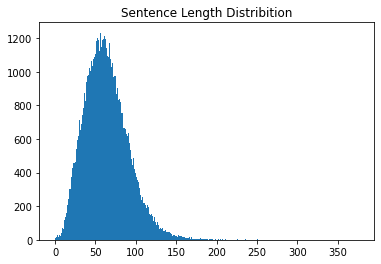

In [ ]:
# 중복 제거후 다시 문장의 길이 분포 확인하기

min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw)) # set을 사용해서 중복 제거
print('Data Size:', len(cleaned_corpus))

for sen in cleaned_corpus:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print('문장의 최단 길이:', min_len)
print('문장의 최장 길이:', max_len)
print('문장의 평균 길이:', sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width = 1.0)
plt.title('Sentence Length Distribition')
plt.show()

# Data Size는 94123 > 77591
# 문장의 평균 길이는 60 > 64

마지막으로 '모든 데이터를 다 사용할 것이냐' 가 문제인데, 후에 미니 배치를 만들 것을 생각하면 모든 데이터를 다 사용하는 것은 연산 측면에서 비효율적입니다. 미니 배치 특성상 각 데이터의 크기가 모두 동일해야 하기 때문에 가장 긴 데이터를 기준으로 Padding 처리를 해야 합니다. 위의 데이터에서 만약 길이가 100인 문장까지만 사용한다면 데이터는 [ (77591 - 길이 100 초과 문장 수) x 100 ] 의 형태를 갖겠지만 모두 사용할 경우 [ 77591 x 377 ] 로 전자보다 최소 3.7배 큰 메모리를 차지합니다. 학습 시간도 그만큼 더 오래 걸리고요

길이별로 정렬하여 미니 배치를 구성해 Padding을 최소화하는 방법도 있지만 이는 데이터를 섞는 데 편향성이 생길 수 있으므로 지양해야 합니다. 여기서는 길이 150 이상의 데이터를 제거하고 사용하도록 할게요!

그리고 앞서 확인한 것처럼 너무 짧은 데이터는 오히려 노이즈로 작용할 수 있습니다. 따라서 길이가 10 미만인 데이터도 제거하도록 하죠!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


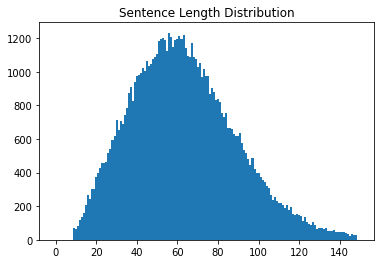

In [ ]:
# 일정 길이의 데이터 제외시키기

max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype = np.int)

for sen in filtered_corpus:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

# 3.공백 기반 토큰화

정제된 데이터를 공백 기반으로 토큰화하여 list에 저장한 후, 아래 tokenize() 함수를 사용해 단어 사전과 Tensor 데이터를 얻자
그리고 단어 사전의 크기를 확인한다.

In [ ]:
def tokenize(corpus): # corpus: Tokenized Sentence's List
  tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
  tokenizer.fit_on_texts(corpus)

  tensor = tokenizer.texts_to_sequences(corpus)
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding = 'post')

  return tensor, tokenizer

In [ ]:
# 정제된 데이터를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해 보세요.
 
split_corpus = []

for kor in filtered_corpus:
  split_corpus.append(kor.split())

In [ ]:
split_tensor, split_tokenier = tokenize(split_corpus)

print('Split Vocab Size:', len(split_tokenier.index_word))

Split Vocab Size: 237435


In [ ]:
# 생성된 단어 사전 확인

for idx, word in enumerate(split_tokenier.word_index):
  print(idx, ':', word)

  if idx > 10 : break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


동사로 이루어진 단어를 살피면 **공백 기반 토큰화의 문제점**을 확인할 수 있습니다. 1번 단어인 `밝혔다.` 는 `밝히다` , `밝다` 등과 유사한 의미를 지니고 있음에도 전혀 다른 단어로 분류되겠죠? 이 때문에 공백 기반 토큰화는 **불필요하게 큰 단어 사전을 가지게 되며 이는 연산량 증가**로 이어집니다.

만일 `밝 + 혔다` 라고 **토큰화**했다면 어땠을까요? `밝 + 히다`, `밝 + 다` 같은 구절이 등장했을 때, 공통된 어절인 `밝` 은 하나로 묶여 **학습 중에 의미를 파악**하기가 수월해지겠죠? 동시에 단어 사전도 효율적으로 축소될 것입니다. 이를 위해 **형태소 분석기**가 존재합니다!

# 4.형태소 기반 토큰화

한국어 형태소 분석기는 대표적으로 *Khaiii*와 *KoNLPy*가 사용됩니다. 이번 코스에서는 *KoNLPy,* 그중에서도 가장 성능이 준수한 MeCab클래스를 활용해 실습하도록 하겠습니다!

앞서 작성했던 코드를 활용해 MeCab 기반으로 생성된 단어 사전과 Tensor 데이터를 얻어 봅시다!


In [ ]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요. 
# Hint : mecab.morphs()를 사용해서 형태소분석을 합니다.

def mecab_split(sentence):
  return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
  mecab_corpus.append(mecab_split(kor))

In [ ]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


- **`tokenizer.sequences_to_texts()`** 함수를 사용하여 Decoding
- **`tokenizer.index_word`** 를 사용하여 Decoding

두 가지 방법으로 **`mecab_tensor[100]`** 을 원문으로 되돌려 보세요!(여기서 띄어쓰기는 고려하지 않습니다!)

In [ ]:
# Case 1 : tokenizer.sequences_to_texts()

texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

" 우리 는 친한 가족 이 며 우리 가족 을 돌보 려 한다 .


In [ ]:
# Case 2 : tokenizer.index_word

sentence = ''

for w in mecab_tensor[100]:
  if w == 0: continue
  sentence += mecab_tokenizer.index_word[w] + ' '

print(sentence)

" 우리 는 친한 가족 이 며 우리 가족 을 돌보 려 한다 . 
